## Precision-Recall tradeoff

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

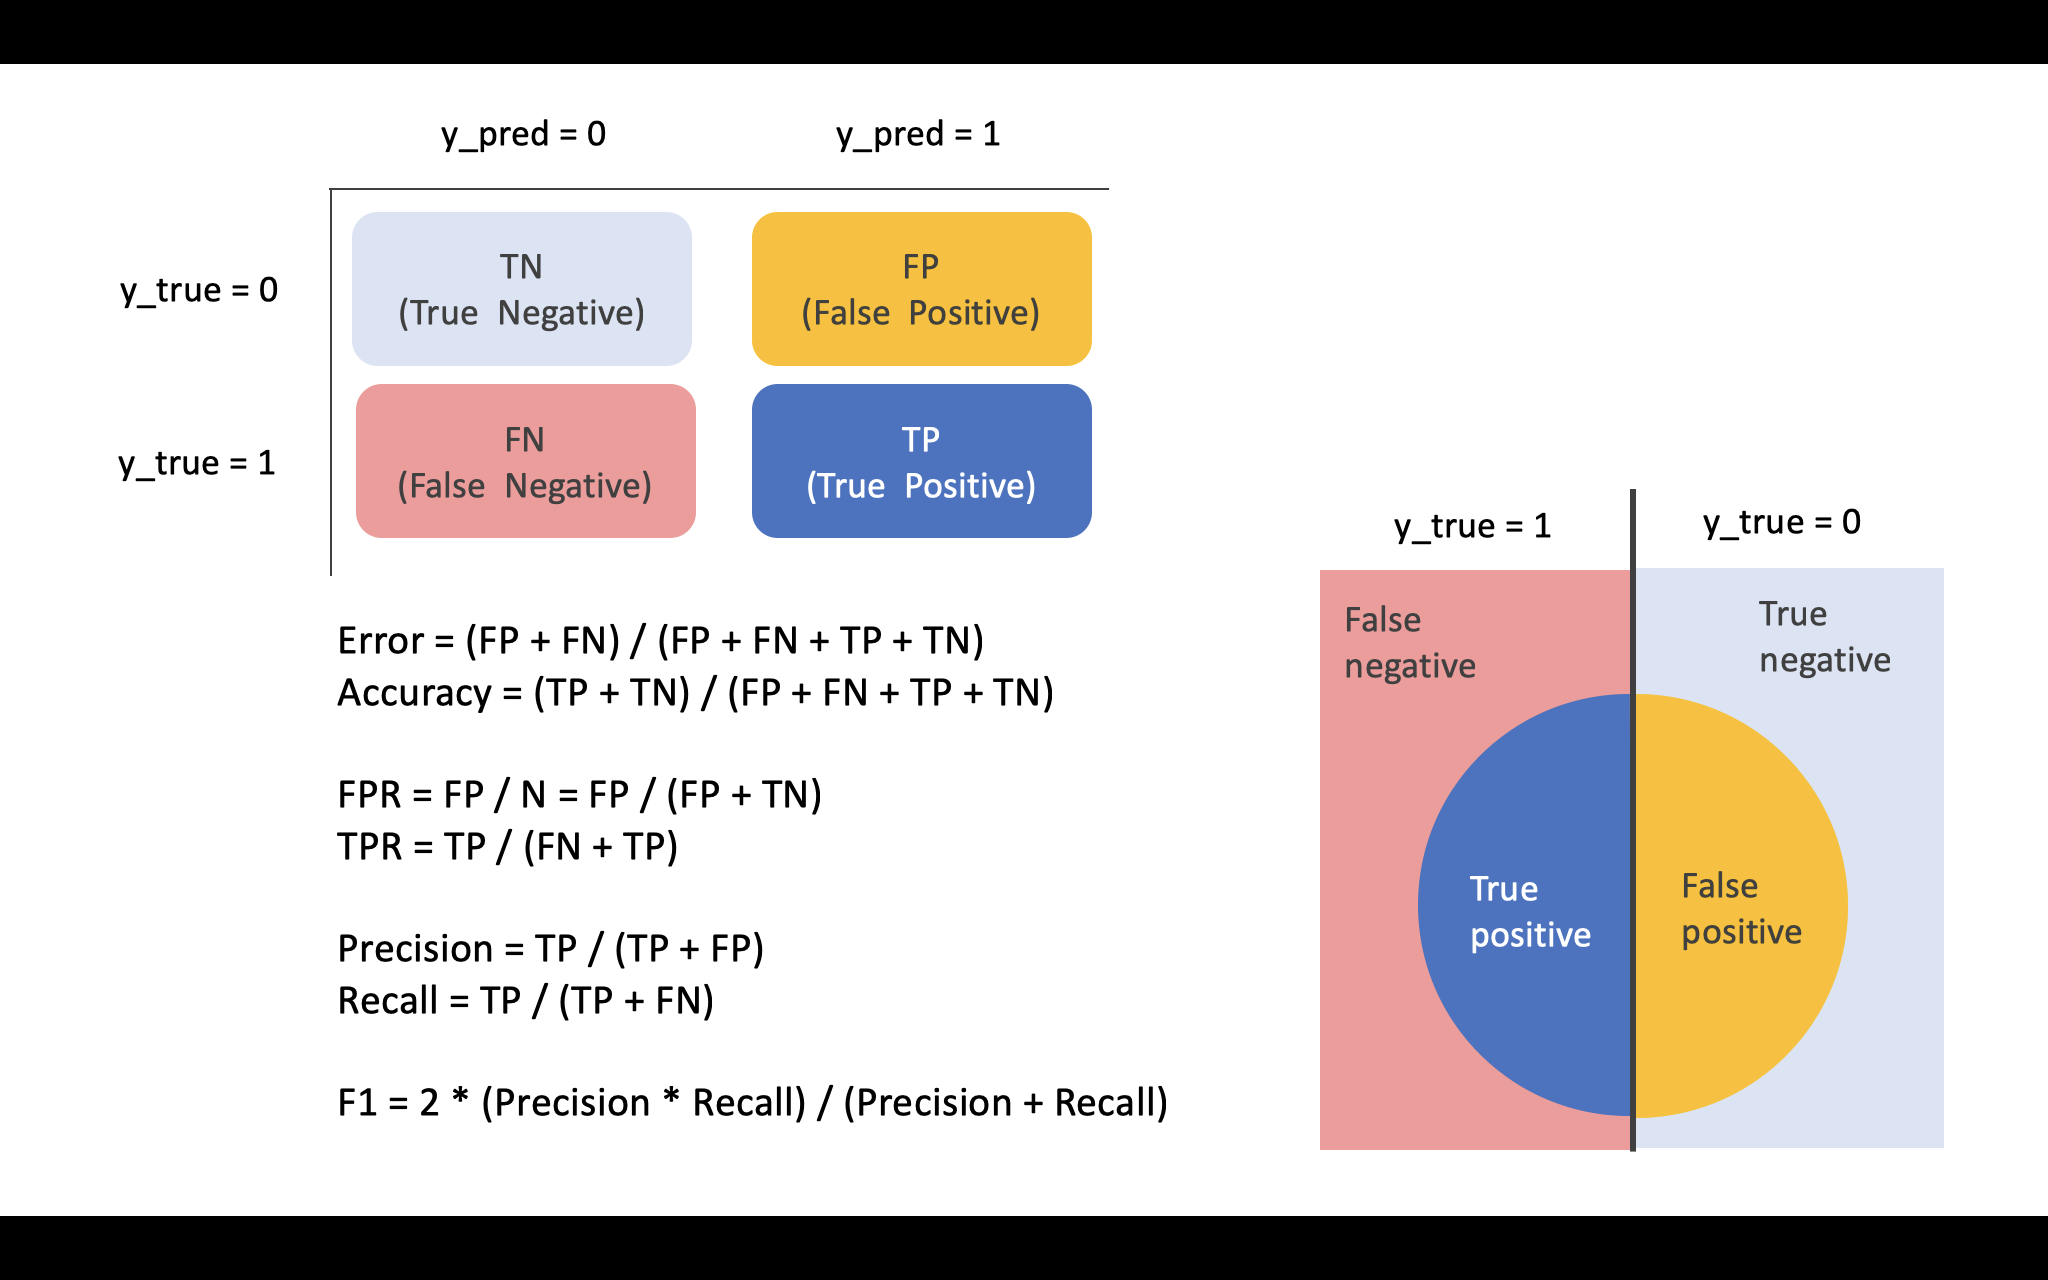

In [2]:
Image(filename='./charts/precision_recall_tradeoff_1.png', width=600)

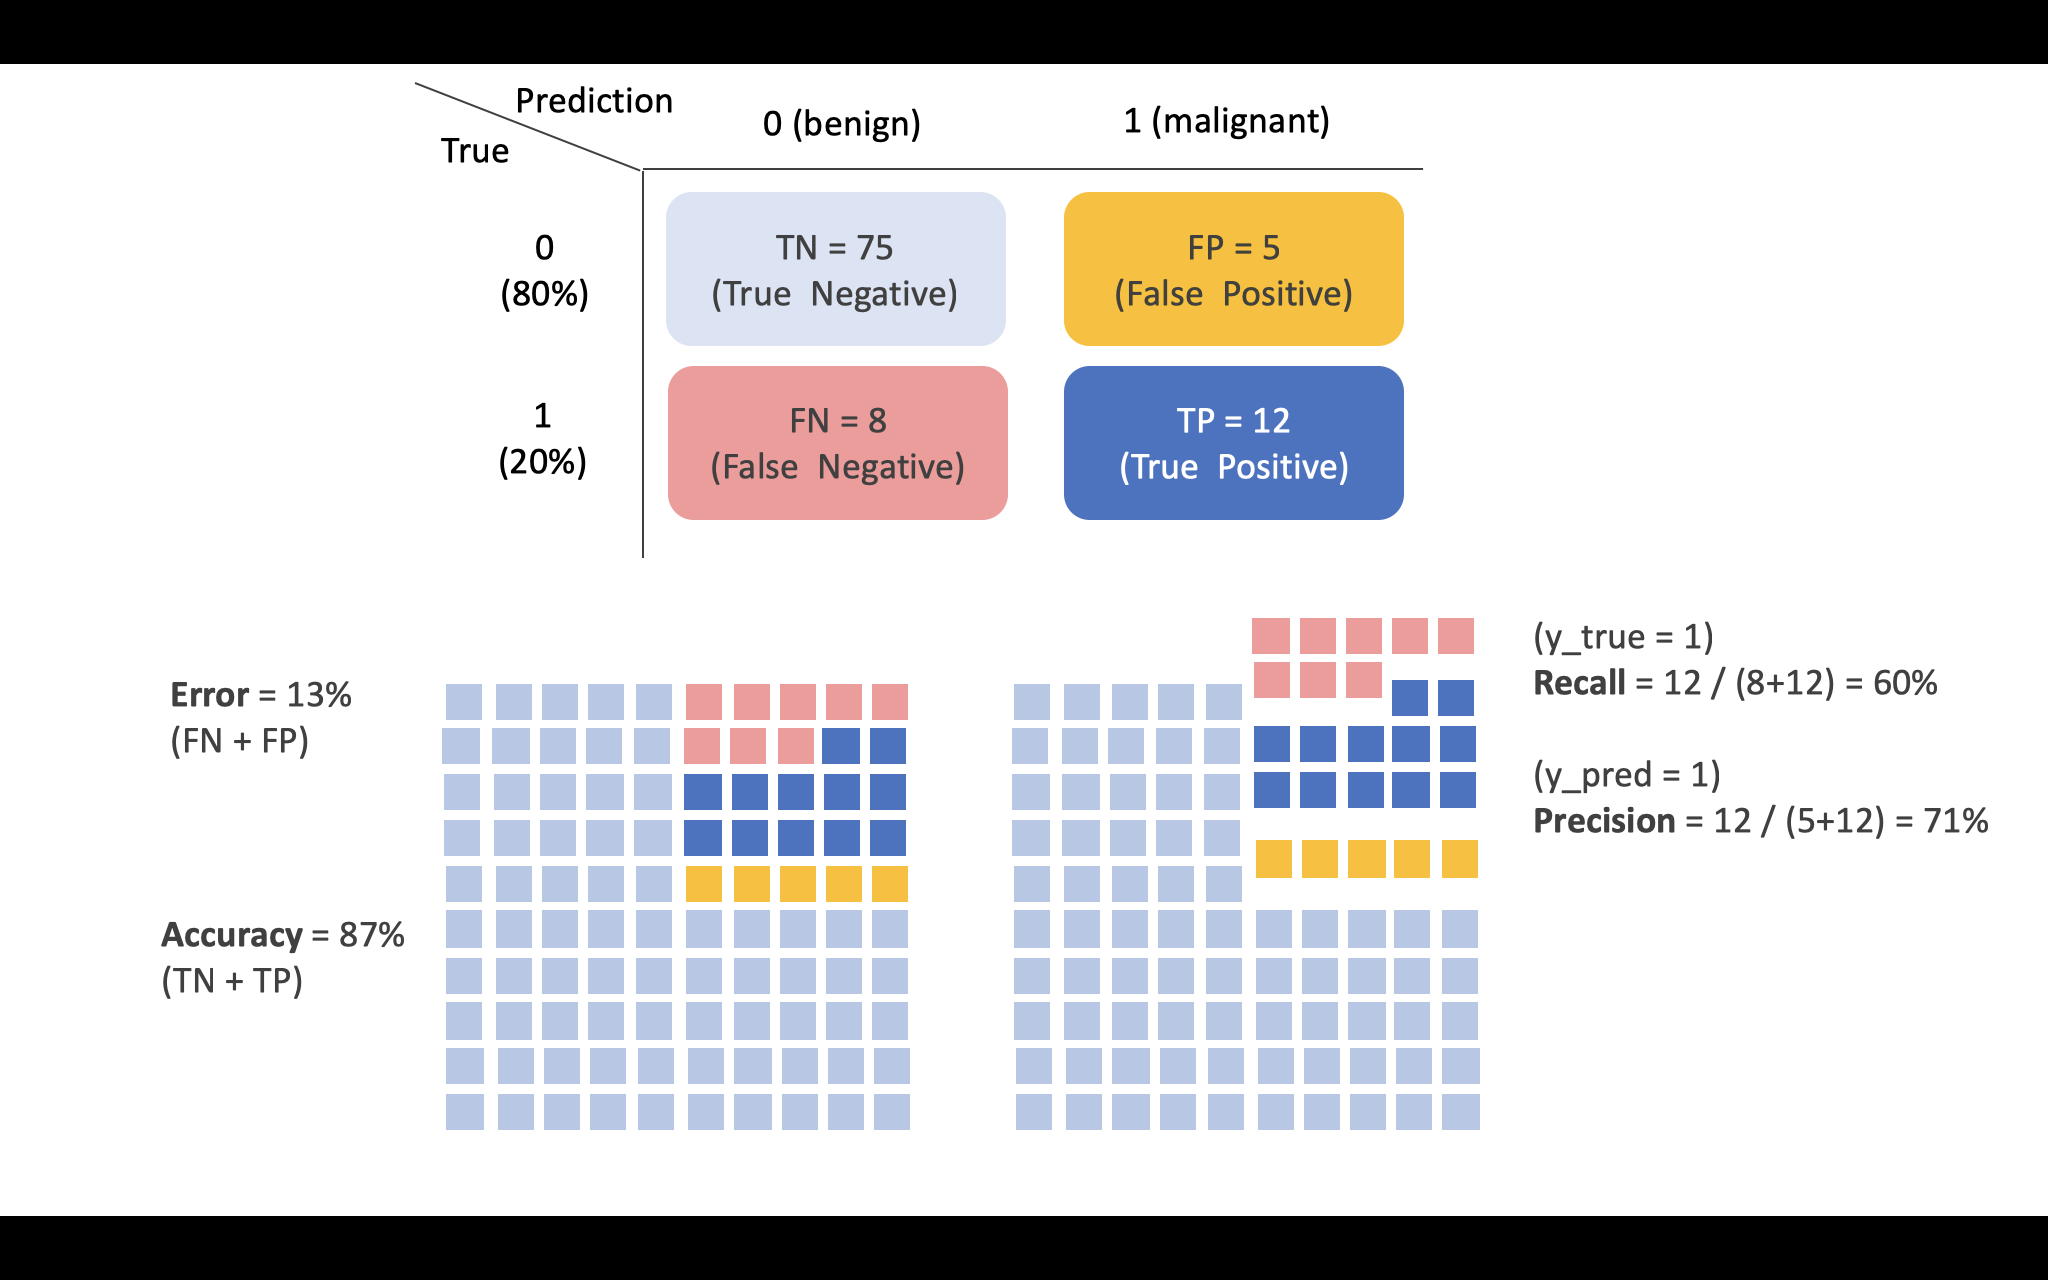

In [3]:
Image(filename='./charts/precision_recall_tradeoff_2.png', width=600)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
from scipy.io import loadmat
mnist = loadmat('./data/mnist-original.mat')
X = mnist['data'].T
y = mnist['label'].T.reshape(-1).astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

[0 1 2 3 4 5 6 7 8 9]


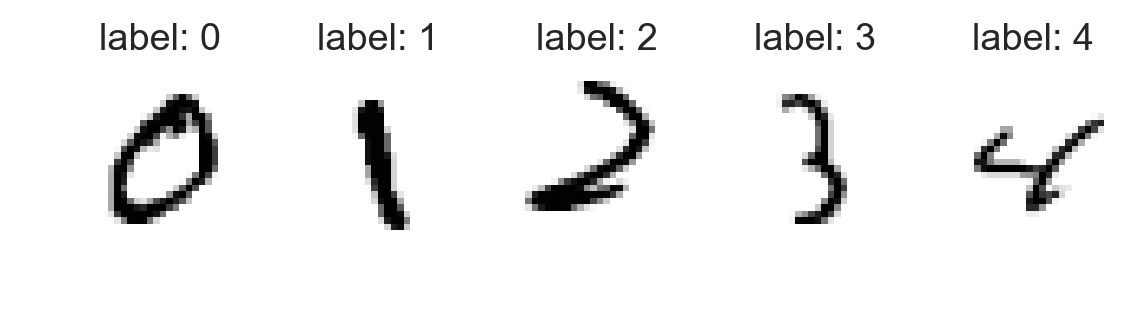

In [6]:
print(np.unique(y))

fig, axes = plt.subplots(1, 5, dpi=227)
for idx, ax in zip([0, 7000, 14000, 21000, 28000], axes):
    ax.imshow(X[idx].reshape(28, 28), cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title(f'label: {y[idx]}')

In [7]:
from sklearn.linear_model import SGDClassifier

y_train_5 = y_train == 5
y_test_5 = y_test == 5

clf = SGDClassifier()
y_train_pred = cross_val_predict(clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[46884,   881],
       [ 1091,  3644]])

Precission: 0.805
Recall: 0.770
F1: 0.787
[[46884   881]
 [ 1091  3644]]


(0.0, 1.0, 0.0, 1.0)

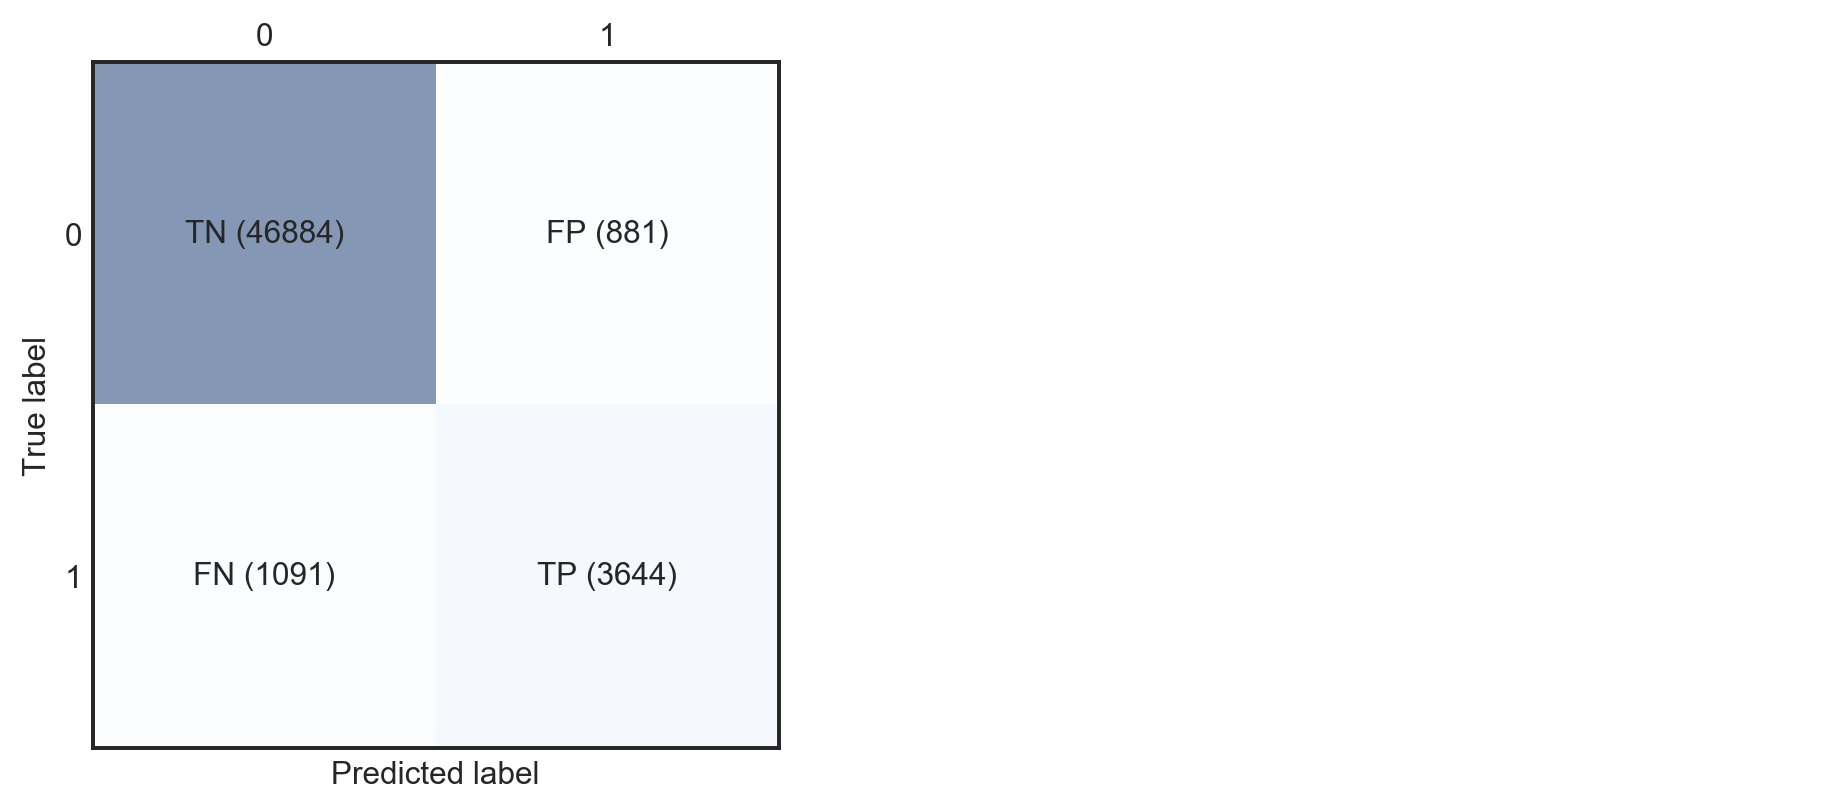

In [8]:
print(f'Precission: {precision_score(y_true=y_train_5, y_pred=y_train_pred):.3f}')
print(f'Recall: {recall_score(y_true=y_train_5, y_pred=y_train_pred):.3f}')
print(f'F1: {f1_score(y_true=y_train_5, y_pred=y_train_pred):.3f}')

confmat = confusion_matrix(y_true=y_train_5, y_pred=y_train_pred)
print(confmat)
texts = [['TN', 'FP'], ['FN', 'TP']]

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        axes[0].text(x=j, y=i, s=f'{texts[i][j]} ({confmat[i][j]})', va='center', ha='center')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[1].axis('off')

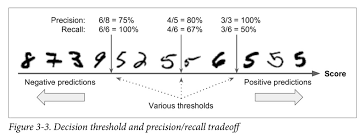

In [9]:
Image(filename = './charts/precision_recall_tradeoff_3.png', width=500)

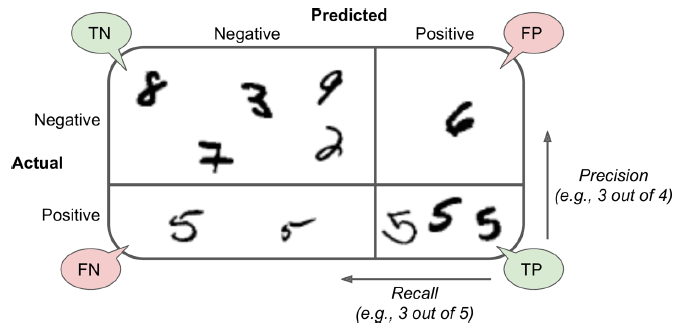

In [10]:
Image(filename = './charts/precision_recall_tradeoff_4.png', width=500)

In [11]:
clf.fit(X_train, y_train_5)
for threshold in [-500000, -250000, -125000]:
    print(clf.decision_function(X[10000].reshape(1, -1)) > threshold, y[10000])

[ True] 1
[False] 1
[False] 1


In [12]:
y_scores = cross_val_predict(clf, X_train, y_train_5, cv=3, method='decision_function', n_jobs=-1)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

y_scores.shape, thresholds.shape, precisions.shape, recalls.shape

((52500,), (51598,), (51599,), (51599,))

Text(0, 0.5, 'Precision')

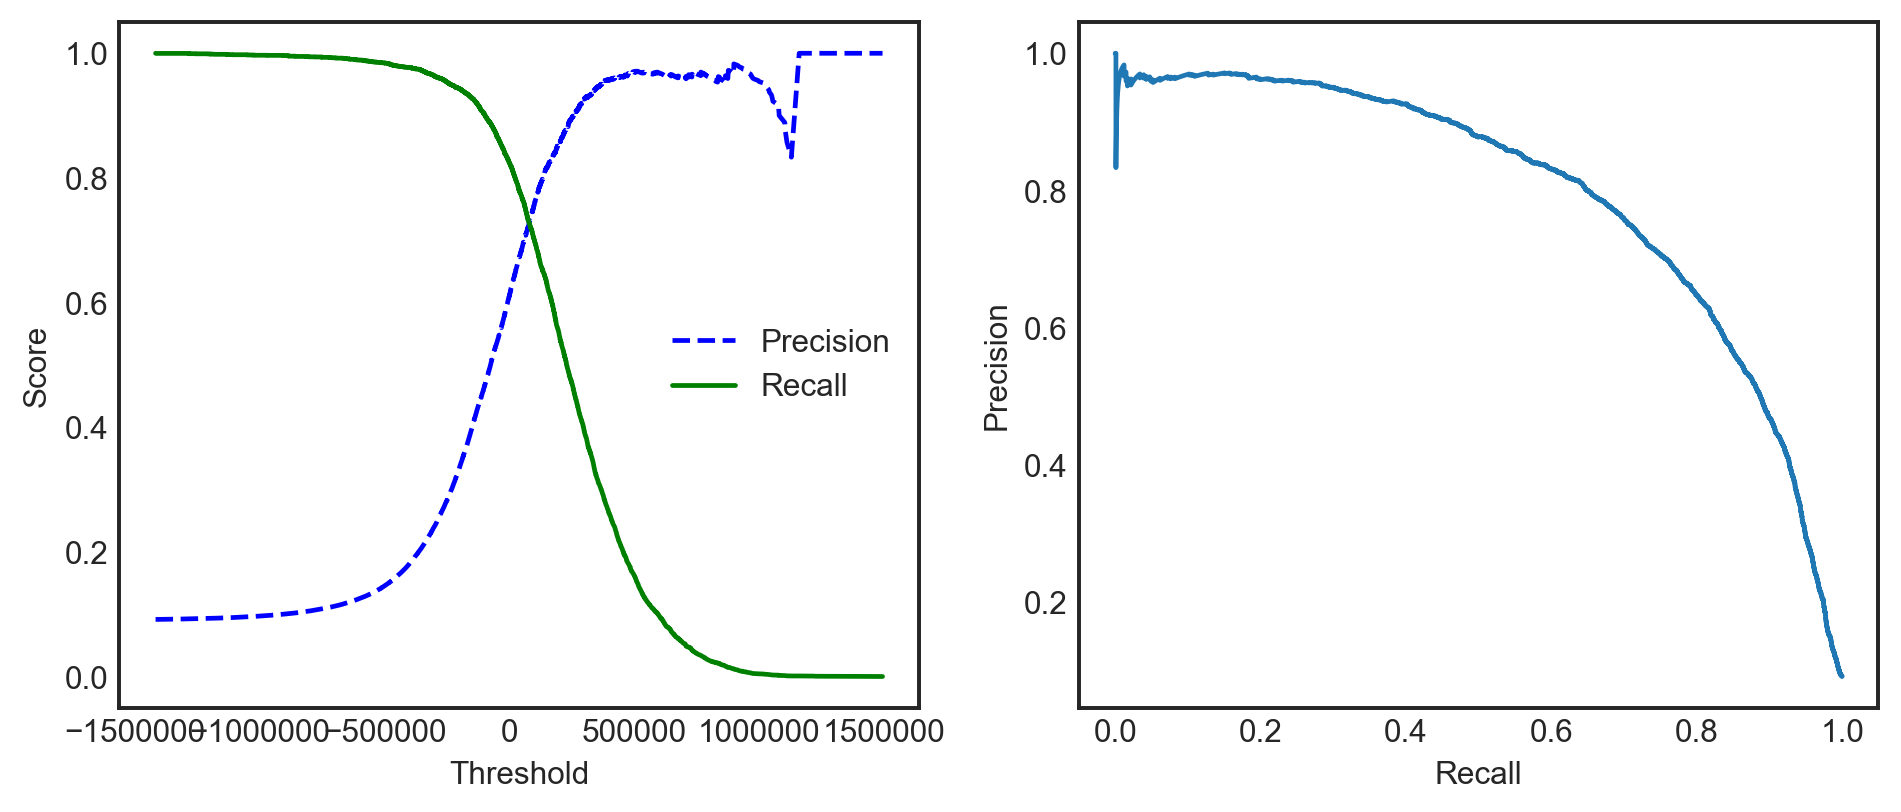

In [13]:
fig, ax = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision')
ax[0].plot(thresholds, recalls[:-1], 'g-', label='Recall')
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Score')
ax[0].legend()

ax[1].plot(recalls, precisions)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')

(0.0, 1.0, 0.0, 1.0)

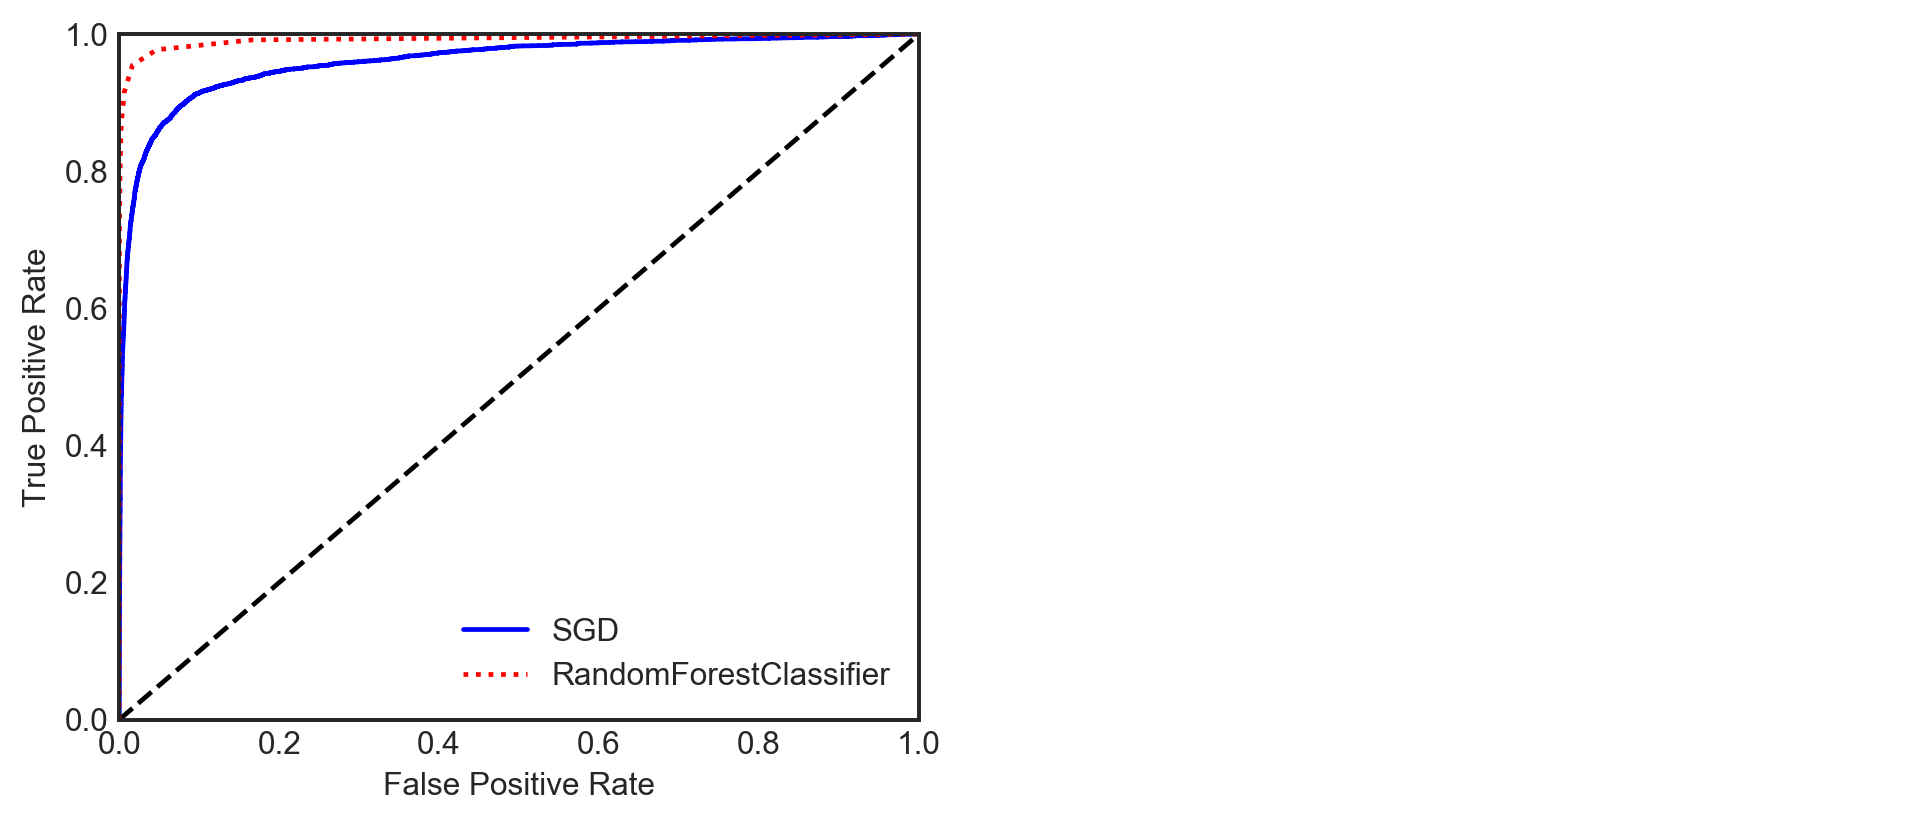

In [14]:
clf = SGDClassifier(random_state=0)
y_scores = cross_val_predict(clf, X_train, y_train_5, cv=3, method='decision_function', n_jobs=-1)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].plot(fpr, tpr, 'b-', label='SGD')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].axis([0, 1, 0, 1])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train_5)
y_proba = cross_val_predict(forest, X_train, y_train_5, cv=3, method='predict_proba', n_jobs=-1)
y_scores = y_proba[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores)
axes[0].plot(fpr_forest, tpr_forest, 'r:', label='RandomForestClassifier')
axes[0].legend()
axes[1].axis('off')

### Multi-class classification

Precission: 0.866
Recall: 0.864
F1: 0.863


(0.0, 1.0, 0.0, 1.0)

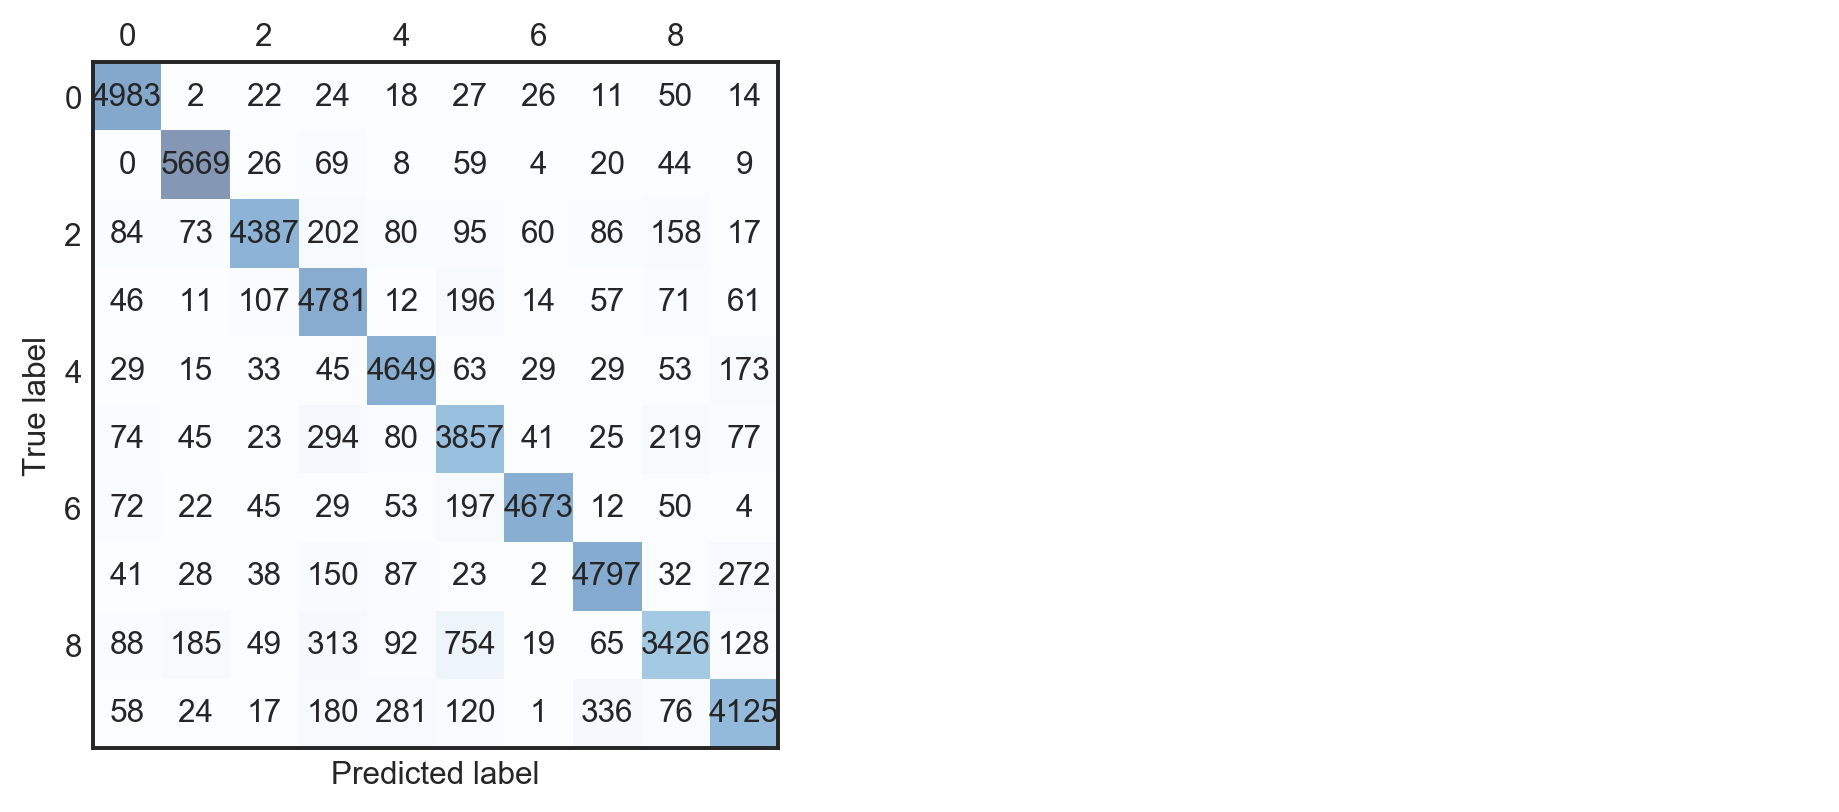

In [15]:
clf = SGDClassifier()
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3, n_jobs=-1)
confusion_matrix(y_train, y_train_pred)

print(f'Precission: {precision_score(y_true=y_train, y_pred=y_train_pred, average="weighted"):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred, average="weighted"):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred, average="weighted"):.3f}')

confmat = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
      
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        axes[0].text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[1].axis('off')